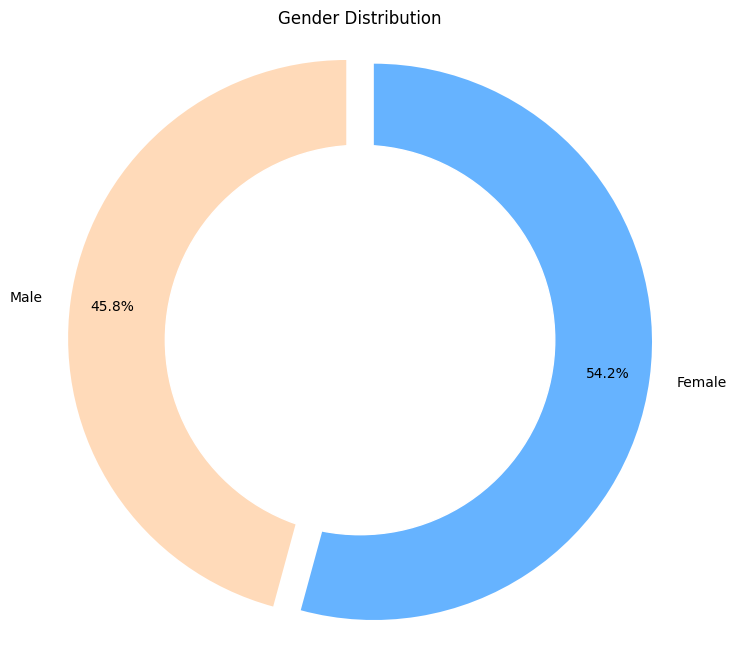

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
mcdonalds_df = pd.read_csv('mcdonalds.csv')

# Gender Distribution Donut Chart
labels = ['Male', 'Female']
sizes = [mcdonalds_df.query('Gender == "Male"').Gender.count(),
         mcdonalds_df.query('Gender == "Female"').Gender.count()]

# Colors and explosion
colors = ['#ffdaB9', '#66b3ff']
explode = (0.05, 0.05)

plt.figure(figsize=(8, 8))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
p = plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.title('Gender Distribution')
plt.show()


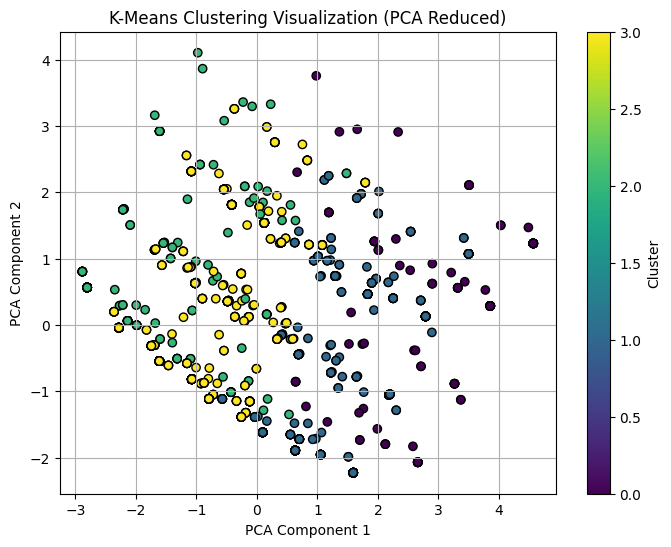

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Data Preprocessing

# Convert categorical variables to numerical (assuming they are binary 'Yes'/'No' or other categorizations)
for column in mcdonalds_df.columns:
    if mcdonalds_df[column].dtype == 'object':
        if len(mcdonalds_df[column].unique()) == 2:
            mcdonalds_df[column] = LabelEncoder().fit_transform(mcdonalds_df[column])

# Scale the data (excluding non-numeric columns)
numeric_columns = mcdonalds_df.drop(columns=['Like', 'Age', 'VisitFrequency', 'Gender']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(mcdonalds_df[numeric_columns])

# Step 2: Clustering with K-Means (already done earlier)
# Let's assume 4 clusters for this example
kmeans = KMeans(n_clusters=4, random_state=42)
mcdonalds_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 3: PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Step 4: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=mcdonalds_df['Cluster'], cmap='viridis', edgecolor='black')
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


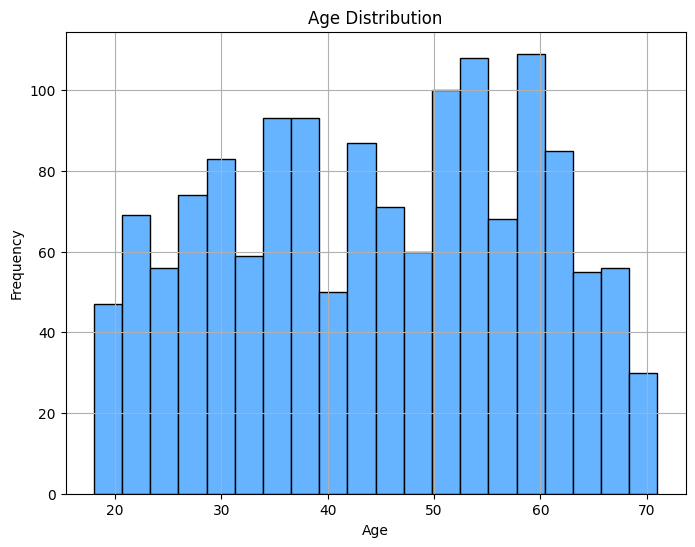

In [31]:
# Age Distribution Histogram
plt.figure(figsize=(8, 6))
plt.hist(mcdonalds_df['Age'].dropna(), bins=20, color='#66b3ff', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


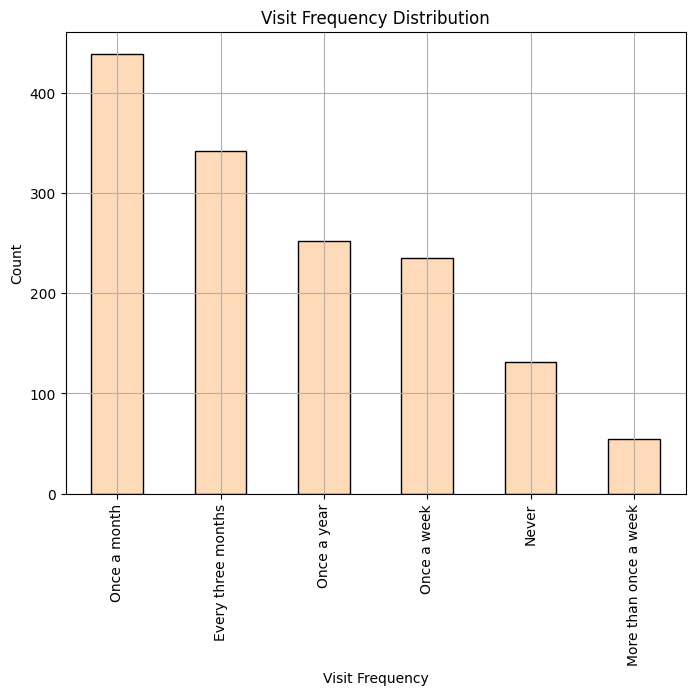

In [32]:
# Visit Frequency Bar Plot
plt.figure(figsize=(8, 6))
mcdonalds_df['VisitFrequency'].value_counts().plot(kind='bar', color='#ffdaB9', edgecolor='black')
plt.title('Visit Frequency Distribution')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()


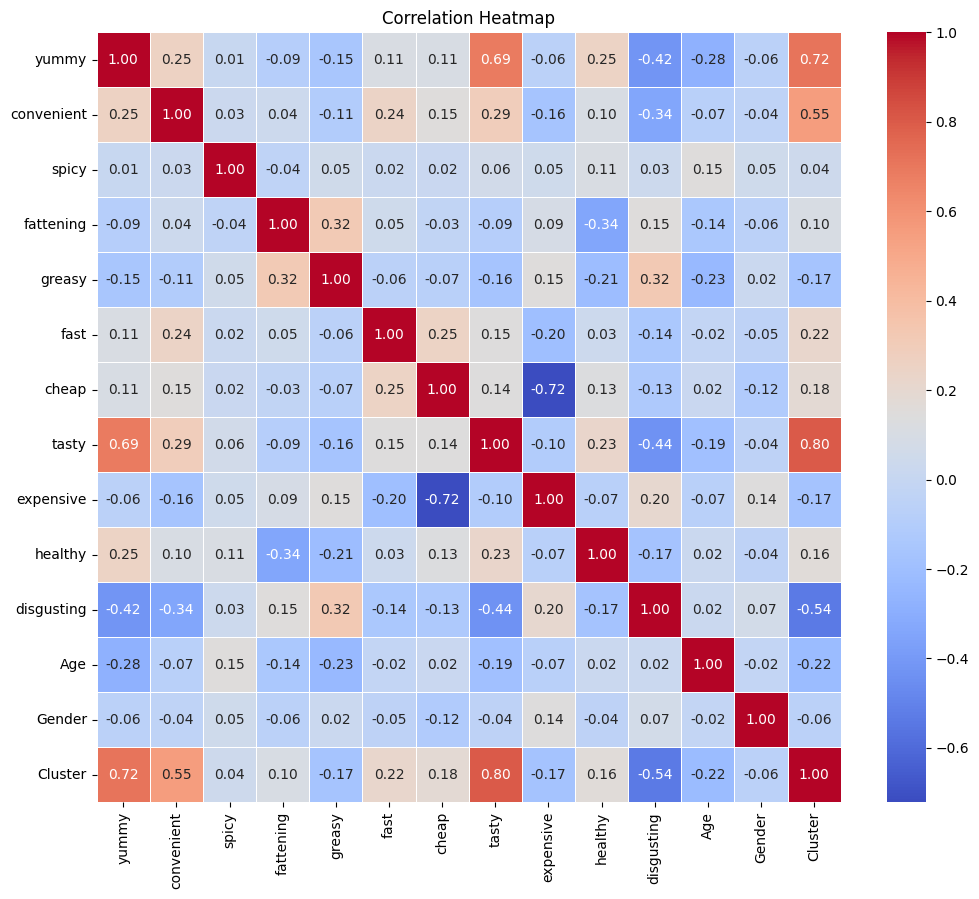

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = mcdonalds_df.select_dtypes(include='number')

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



C:\Users\shara\AppData\Local\Temp\ipykernel_16188\1891956464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Like', data=mcdonalds_df, palette='Set2')


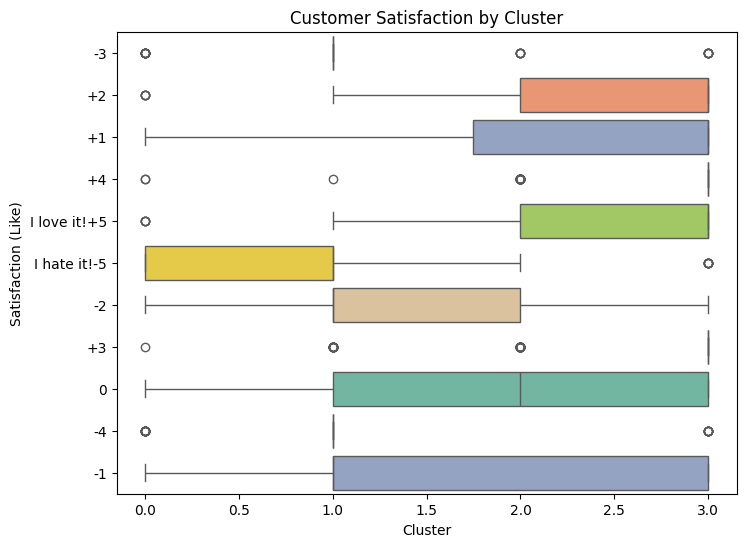

In [34]:
# Boxplot of Satisfaction by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Like', data=mcdonalds_df, palette='Set2')
plt.title('Customer Satisfaction by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Satisfaction (Like)')
plt.show()


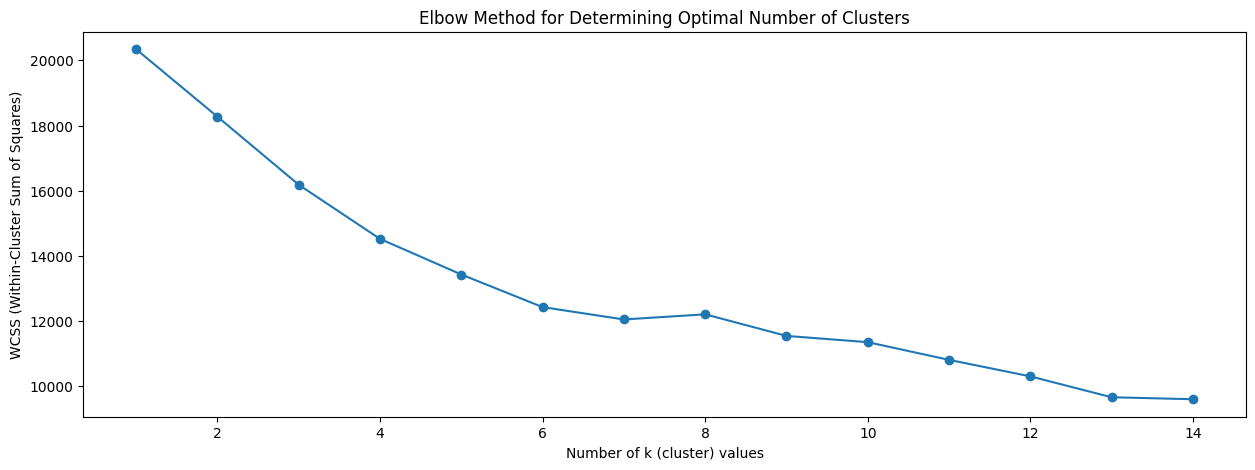

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the McDonald's dataset
mcdonalds_data_path = 'mcdonalds.csv'
mcdonalds_df = pd.read_csv(mcdonalds_data_path)

# Convert categorical variables to numerical values
label_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']
label_encoders = {col: LabelEncoder() for col in label_columns}

for col in label_columns:
    mcdonalds_df[col] = label_encoders[col].fit_transform(mcdonalds_df[col])

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mcdonalds_df.drop(['Age'], axis=1))

# Prepare the data model
data_model = pd.DataFrame(scaled_features, columns=mcdonalds_df.drop(['Age'], axis=1).columns)

# Calculate WCSS for different numbers of clusters
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel("Number of k (cluster) values")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Determining Optimal Number of Clusters")
plt.show()


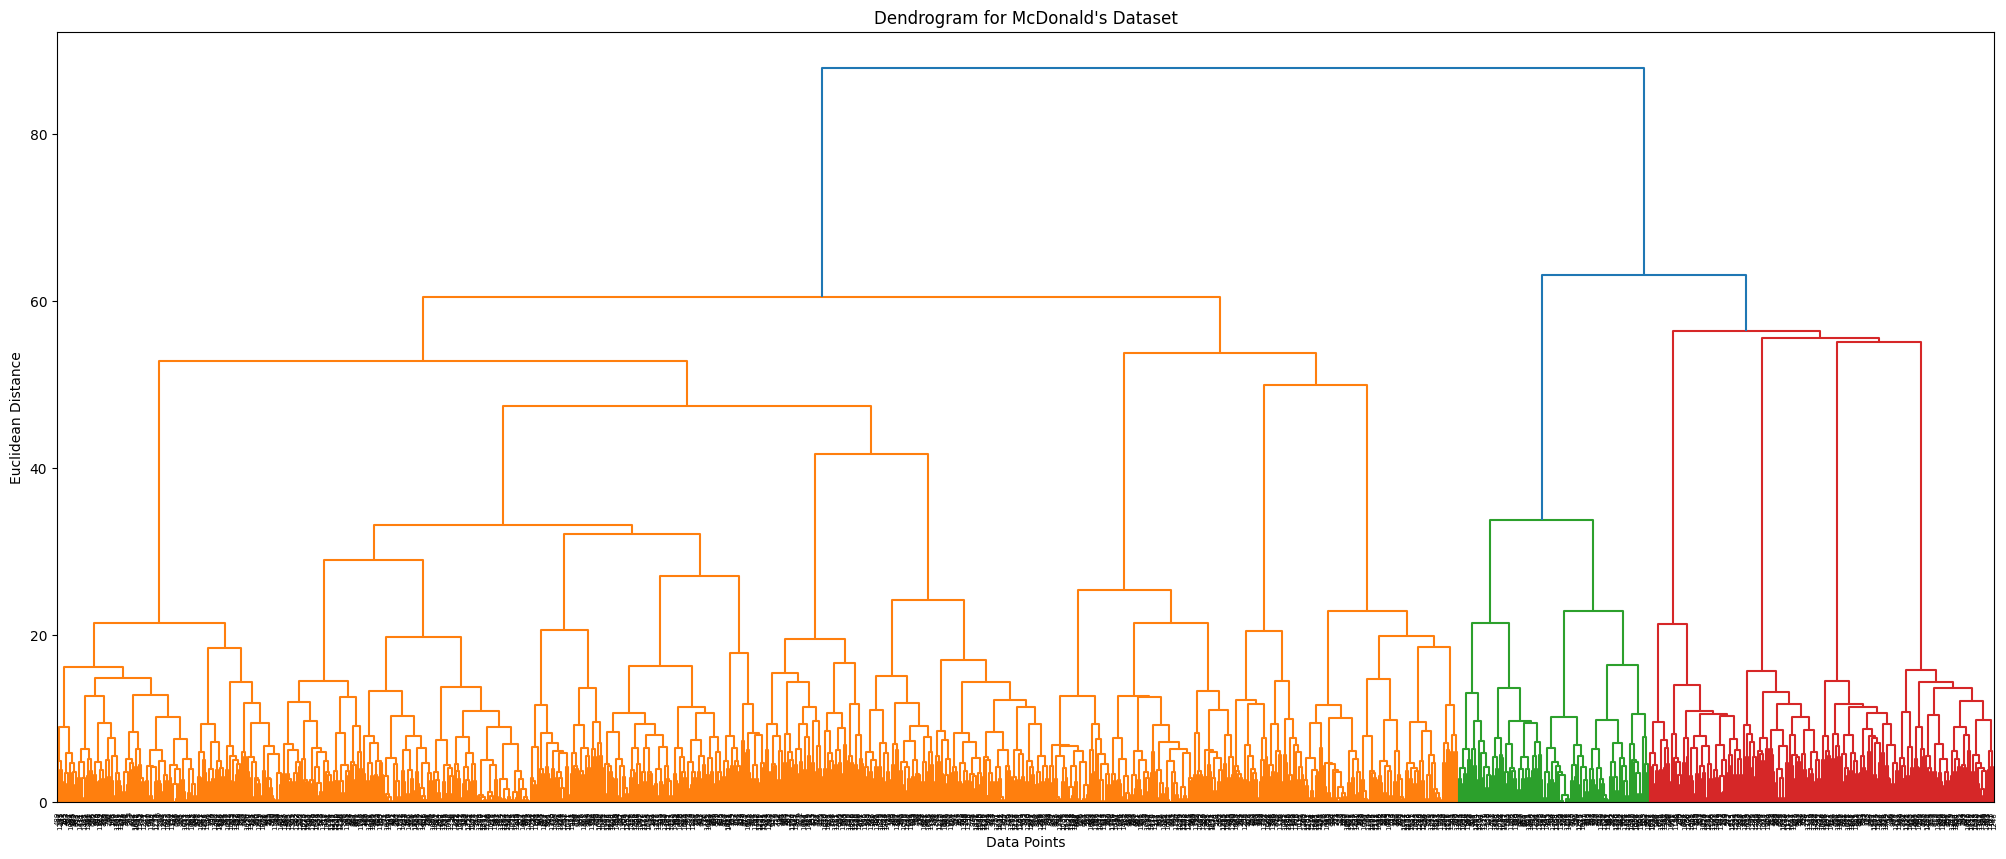

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
# Step 1: Data Preprocessing

# Convert categorical variables to numerical using one-hot encoding
data_model = pd.get_dummies(mcdonalds_df, drop_first=True)

# Standardize the features
scaler = StandardScaler()
scaled_data_model = scaler.fit_transform(data_model)

# Step 2: Create the linkage matrix using the Ward method
merg = linkage(scaled_data_model, method="ward")

# Step 3: Plot the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram for McDonald's Dataset")
plt.show()


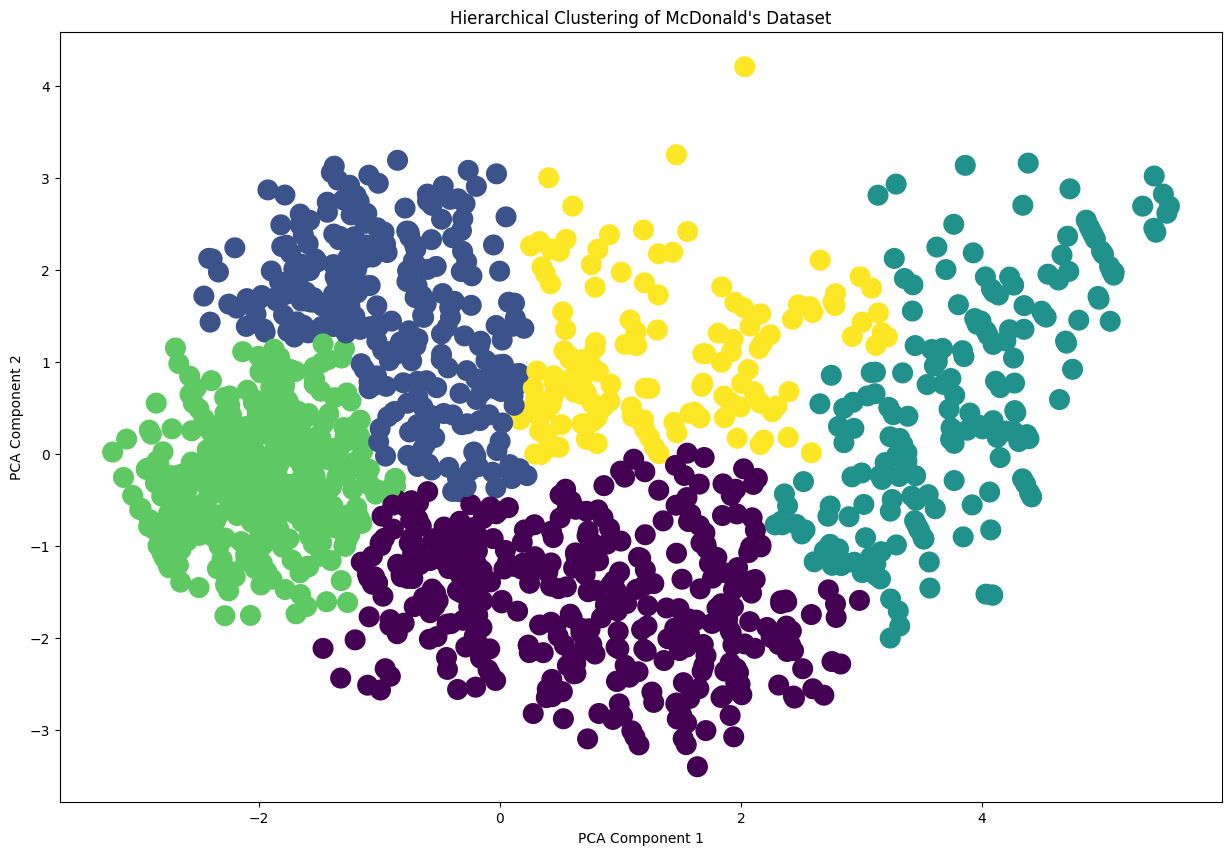

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Convert categorical variables to numerical using one-hot encoding
data_model = pd.get_dummies(mcdonalds_df, drop_first=True)

# Standardize the features
scaler = StandardScaler()
scaled_data_model = scaler.fit_transform(data_model)

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data_model)

# Create the hierarchical clustering model
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
data_predict = hierarchical_cluster.fit_predict(pca_data)

# Plotting the scatter plot with clustering results
plt.figure(figsize=(15, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data_predict, s=200, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title("Hierarchical Clustering of McDonald's Dataset")
plt.show()
